# Importing Necessary Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense ,LSTM

In [26]:
# Importing the dataset
dtrain=pd.read_csv('Google_Stock_Price_Train.csv')

In [27]:
# Looking first five instances
dtrain.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [28]:
# Taking data of Column 'Open' Only
dtrain=dtrain.iloc[:,1:2].values

In [65]:
dtrain

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [30]:
# Scaling
sc=MinMaxScaler()
dtrain=sc.fit_transform(dtrain)

In [31]:
# Getting the Input & output (Single time step future stock predcition)
X_train=dtrain[0:dtrain.shape[0]-1]
y_train=dtrain[1:dtrain.shape[0]]

X is at time 't' and y is at time 't+1'

In [32]:
# Reshaping (According to Keras documentation)
X_train=np.reshape(X_train,(X_train.shape[0],1,1))

# Model Building

In [55]:
# Initializing the Sequence Model
regressor=Sequential()

# Adding LSTM Layer
regressor.add(LSTM(units=4,activation='tanh',input_shape=(None,1)))

#Adding final dense layer
regressor.add(Dense(units=1))

In [56]:
# Compiling the model
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [57]:
# Summary of Model
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Fitting the model
regressor.fit(X_train,y_train,batch_size=32,epochs=200)


Epoch 1/200
40/40 [==============================] - 6s 5ms/step - loss: 0.2265
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 0.1523
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0985
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0586
Epoch 5/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0394
Epoch 6/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0304
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0277
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0243
Epoch 9/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0212
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0180
Epoch 11/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0153
Epoch 12/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0130
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.8017e-04
Epoch 99/200
40/40 [==============================] - 0s 5ms/step - loss: 2.2237e-04
Epoch 100/200
40/40 [==============================] - 0s 5ms/step - loss: 2.2222e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.3749e-04
Epoch 102/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6619e-04
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6536e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4950e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.2482e-04
Epoch 106/200
40/40 [==============================] - 0s 5ms/step - loss: 2.3002e-04
Epoch 107/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6009e-04
Epoch 108/200
40/40 [==============================] - 0s 5ms/step - loss: 1.9887e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - 

40/40 [==============================] - 0s 4ms/step - loss: 2.1786e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6199e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.3813e-04
Epoch 196/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5315e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.1818e-04
Epoch 198/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5305e-04
Epoch 199/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5893e-04
Epoch 200/200
40/40 [==============================] - 0s 4ms/step - loss: 2.0394e-04


# Making prediction on Unseen data

In [59]:
dtest=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dtest.iloc[:,1:2].values

In [60]:
dtest=sc.transform(real_stock_price)
dtest=np.reshape(dtest,(real_stock_price.shape[0],1,1))

In [61]:
predicted_stock_price=regressor.predict(dtest)

In [62]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

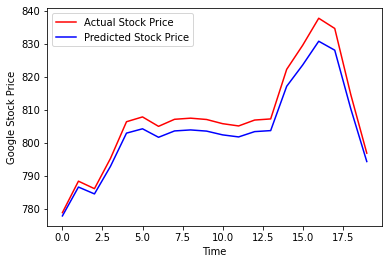

In [63]:
# Visulization
plt.plot(real_stock_price,color='red',label='Actual Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()